# EDA và Feature Engineering

## Setup

Nhập các thư viện cần thiết:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import gmplot 
import folium
from branca.colormap import LinearColormap
from shapely.geometry import Point, shape
import fiona
from pandas.plotting import scatter_matrix

Thiết lập kích thước và kiểu hình ảnh đầu ra:

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 1. Tải và khám phá dữ liệu

In [8]:
# housing_1 = pd.read_csv('/home/letruongzzio/Documents/Data Science/Projects/data/housing.csv', sep='\t')
# housing_2 = pd.read_csv('/home/letruongzzio/Documents/Data Science/Projects/data/housing_1.csv', sep='\t')

In [9]:
# housing = pd.concat([housing_1, housing_2], axis=0)

In [10]:
housing = pd.read_csv('/home/letruongzzio/Documents/Data Science/EDA_FE/data/housing.csv', sep='\t')

Xem sơ qua một chút về cấu trúc dữ liệu:

In [11]:
housing

,Title,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Địa chỉ,Description,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,ExtractedTitle,Address1,Address2,lat1,lon1,lat2,lon2
0,"Bán nhà đẹp 4 tầng Bùi Tá Hán, An Phú, Q2 4x20...",6.5,80.0,4.0,4.0,"Quận 2, Hồ Chí Minh","- Bán nhà mặt tiền Bùi Tá Hán, An Phú, Q2\n- D...",False,False,True,"Bùi Tá Hán, An Phú, Quận 2","Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",107.935.216,1.067.308.195,107.942.636,1.067.448.532
1,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,15.8,138.0,5.0,6.0,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...",(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,False,False,True,"đường 19/5, khu đô thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
2,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,9.2,138.0,5.0,6.0,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...",(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,True,False,True,"đường 19/5, Khu Đô Thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
3,"HXH-NGUYỄN HỮU TIẾN, TÂN PHÚ-57M2 ngang 4.1m- ...",9.2,57.0,4.0,3.0,NaN,- Vị trí trung tâm Tân Phú gần trường Đại học ...,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",108.100.714,1.066.256.809,108.100.714,1.066.256.809
4,"Bán nhà kế Phạm Văn Hai Phường 6 Tân Bình, 55m...",6.1,55.0,NaN,NaN,NaN,KẾ PHẠM VĂN HAI PHƯỜNG 6 TÂN BÌNH - DT TO 55M2...,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",107.945.549,1.066.632.715,107.945.549,1.066.632.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,BÁN NHÀ MẶT TIỀN ĐƯỜNG SỐ+LÊ THỊ HOA.PHƯỜNG BÌ...,5.9,115.0,3.0,3.0,Đường 18 phường bình chiểu tp thủ đức,Bán gấp nhà\nVị trí.mặt tiền đường số.\nNgay s...,True,True,True,"đường số, Phường Bình Chiểu, TP Thủ Đức",Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",108.748.694,1.067.340.729,108.775.897,1.067.264.125
3354,"Bán Nhà Đặng Văn Bi, Thủ Đức, Nhà Đẹp Giá Rẻ, ...",6.7,75.0,4.0,2.0,"Đặng Văn Bi, Thủ Đức",Mô Tả\n+ Chủ giảm chào 300tr chỉ còn 5tỷ2.\n+ ...,False,False,True,"đường Đặng Văn Bi, Thủ Đức","Đặng Văn Bi, Thủ Đức","đường Đặng Văn Bi, Thủ Đức",108.439.717,106.762.358,108.380.903,106.766.843
3355,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",5.2,70.0,6.0,5.0,NaN,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",210.464.835,1.058.773.208,210.464.835,1.058.773.208
3356,BÁN NHÀ C4 60m2.GIÁ BAO ĐẦU TƯ-GẦN NGÃ TƯ BÌNH...,12.8,60.0,2.0,1.0,Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,Bán gấp căn nhà C4\nDiện tích 5 X 12. Vuông vứ...,False,False,True,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",108.626.092,1.067.249.628,108.651.451,1.067.236.161


In [12]:
housing.describe()

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC
count,3.358000e+03,3.060000e+03,2100.000000,1960.000000
mean,2.398859e+10,1.315262e+04,4.073095,3.720918
std,9.760426e+11,5.112244e+05,2.522555,2.645302
min,1.050000e+00,4.000000e+00,1.000000,1.000000
25%,4.300000e+00,4.300000e+01,3.000000,2.000000
50%,6.225000e+00,6.000000e+01,4.000000,3.000000
75%,1.280000e+01,8.200000e+01,5.000000,4.000000
max,4.000000e+13,2.000000e+07,45.000000,48.000000


Dựa trên mô tả về  `housing` dataset, tôi sẽ đưa ra một số nhận xét như sau:

+ Phân phối giá: Giá nhà có sự biến động lớn với giá trị trung bình khoảng $3.35\times 10^3$ tỷ VND, nhưng độ lệch chuẩn rất cao, cho thấy sự chênh lệch giá lớn giữa các ngôi nhà. Khả năng cao dữ liệu trong cột `Price` có chứa nhiều giá trị rác do thu thập dữ liệu sai cách hoặc do người dùng nhập liệu không chính xác.
+ Diện tích: Diện tích trung bình là khoảng $531m^2$ với sự chênh lệch lớn (độ lệch chuẩn khoảng $151 m^2$), cho thấy sự đa dạng về kích thước của các bất động sản.
+ Số phòng ngủ: Số lượng phòng ngủ trung bình là khoảng $4-5$ phòng, với ngôi nhà có nhiều nhất là $45$ phòng ngủ, cho thấy sự đa dạng về quy mô của các ngôi nhà (nhưng có vẻ như một nhà có tới $45$ phòng ngủ là một con số không thực tế).
+ Số phòng WC: Số lượng phòng WC trung bình là khoảng 3, với sự biến động không lớn so với các thuộc tính khác.

Tiếp theo, tôi sẽ thực hiện một số phân tích bằng cách trực quan hóa dữ liệu:

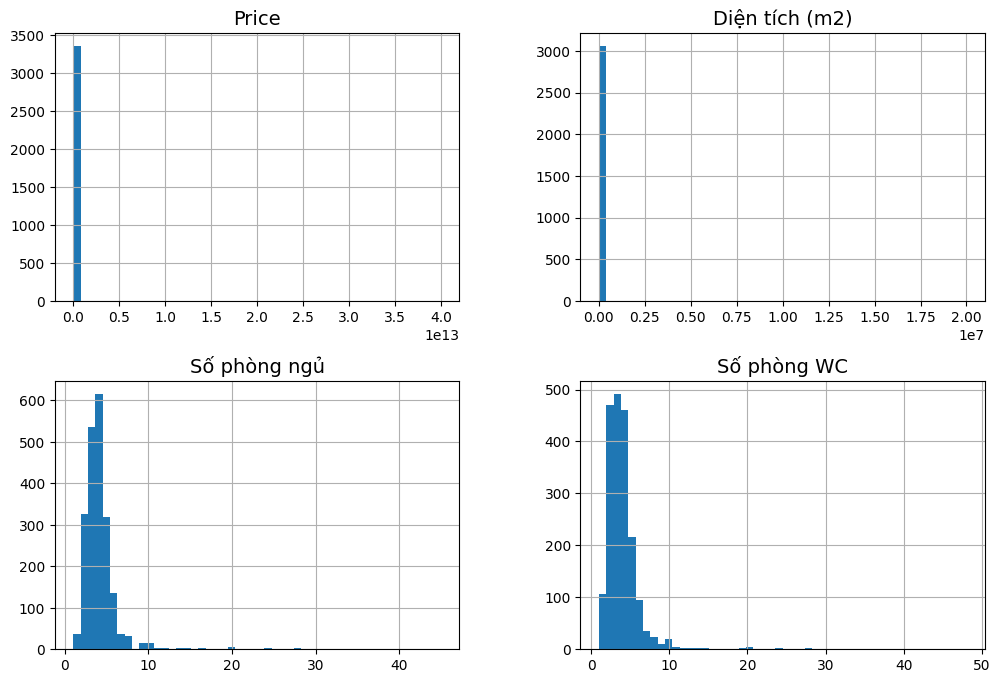

In [13]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

Nhìn vào biểu đồ này, tôi nghĩ dữ liệu dường như đang tồn đọng rất nhiều rủi ro về giá trị rác. Điều này có thể là do dữ liệu bị thiếu hoặc do người dùng cung cấp thông tin thiếu chính xác. Để xác định rõ hơn, tôi sẽ kiểm tra xem có bao nhiêu giá trị bị thiếu trong dữ liệu.

Kiểm tra xem có giá trị thiếu không:

In [14]:
housing.isnull().sum() # Check missing values

Title                 0
Price                 0
Diện tích (m2)      298
Số phòng ngủ       1258
Số phòng WC        1398
Địa chỉ            1529
Description           1
Chỗ để xe hơi         0
Đang cho thuê         0
CSVC xung quanh       0
ExtractedTitle        7
Address1              4
Address2              7
lat1                235
lon1                235
lat2                228
lon2                228
dtype: int64

## 2. Xử lý và làm sạch dữ liệu

Ở các cột `Diên tích (m2)`, `Số phòng ngủ`, `Số phòng WC` và `Địa chỉ` có rất nhiều giá trị thiếu. Điều này có thể ảnh hưởng đến chất lượng của mô hình dự đoán. Để giải quyết vấn đề này, tôi sẽ thực hiện các bước tiền xử lý dữ liệu bằng cách loại bỏ và thay thế  giá trị bị thiếu hoặc giá trị rác:

In [15]:
# Drop Price > 1000 billion (garbage value)
housing.drop(housing[housing['Price'] > 1000].index, axis=0, inplace=True)

# A place with an area larger than 500 m^2 is likely not a house
housing.drop(housing[housing['Diện tích (m2)'] > 500].index, axis=0, inplace=True)
housing.dropna(subset=['Diện tích (m2)'], inplace=True)

# Replace missing values of 'Số phòng ngủ' and 'Số phòng WC' with mean
housing['Số phòng ngủ'] = housing['Số phòng ngủ'].fillna(round(housing['Số phòng ngủ'].mean()))
housing['Số phòng WC'] = housing['Số phòng WC'].fillna(round(housing['Số phòng WC'].mean()))

# Drop missing values of 'lat1', 'lon1', 'lat2' and 'lon2'
housing.dropna(subset=['lat1', 'lon1', 'lat2', 'lon2'], inplace=True)

housing

,Title,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Địa chỉ,Description,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,ExtractedTitle,Address1,Address2,lat1,lon1,lat2,lon2
0,"Bán nhà đẹp 4 tầng Bùi Tá Hán, An Phú, Q2 4x20...",6.5,80.0,4.0,4.0,"Quận 2, Hồ Chí Minh","- Bán nhà mặt tiền Bùi Tá Hán, An Phú, Q2\n- D...",False,False,True,"Bùi Tá Hán, An Phú, Quận 2","Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",107.935.216,1.067.308.195,107.942.636,1.067.448.532
1,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,15.8,138.0,5.0,6.0,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...",(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,False,False,True,"đường 19/5, khu đô thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
2,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,9.2,138.0,5.0,6.0,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...",(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,True,False,True,"đường 19/5, Khu Đô Thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
3,"HXH-NGUYỄN HỮU TIẾN, TÂN PHÚ-57M2 ngang 4.1m- ...",9.2,57.0,4.0,3.0,NaN,- Vị trí trung tâm Tân Phú gần trường Đại học ...,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",108.100.714,1.066.256.809,108.100.714,1.066.256.809
4,"Bán nhà kế Phạm Văn Hai Phường 6 Tân Bình, 55m...",6.1,55.0,4.0,4.0,NaN,KẾ PHẠM VĂN HAI PHƯỜNG 6 TÂN BÌNH - DT TO 55M2...,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",107.945.549,1.066.632.715,107.945.549,1.066.632.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,BÁN NHÀ MẶT TIỀN ĐƯỜNG SỐ+LÊ THỊ HOA.PHƯỜNG BÌ...,5.9,115.0,3.0,3.0,Đường 18 phường bình chiểu tp thủ đức,Bán gấp nhà\nVị trí.mặt tiền đường số.\nNgay s...,True,True,True,"đường số, Phường Bình Chiểu, TP Thủ Đức",Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",108.748.694,1.067.340.729,108.775.897,1.067.264.125
3354,"Bán Nhà Đặng Văn Bi, Thủ Đức, Nhà Đẹp Giá Rẻ, ...",6.7,75.0,4.0,2.0,"Đặng Văn Bi, Thủ Đức",Mô Tả\n+ Chủ giảm chào 300tr chỉ còn 5tỷ2.\n+ ...,False,False,True,"đường Đặng Văn Bi, Thủ Đức","Đặng Văn Bi, Thủ Đức","đường Đặng Văn Bi, Thủ Đức",108.439.717,106.762.358,108.380.903,106.766.843
3355,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",5.2,70.0,6.0,5.0,NaN,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",210.464.835,1.058.773.208,210.464.835,1.058.773.208
3356,BÁN NHÀ C4 60m2.GIÁ BAO ĐẦU TƯ-GẦN NGÃ TƯ BÌNH...,12.8,60.0,2.0,1.0,Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,Bán gấp căn nhà C4\nDiện tích 5 X 12. Vuông vứ...,False,False,True,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",108.626.092,1.067.249.628,108.651.451,1.067.236.161


Ở đậy ta đã được người thu thập dữ liệu cung cấp hai cột `ExtractedTitle`, `Address1` và `Address2` chứa đựng địa chỉ đầy đủ về căn nhà nên ta chỉ cần hợp nhất hai cột này lại thành một dữ liệu có nghĩa nhất. Vì vậy ta không cần quan tâm đến cột `Địa chỉ` nữa. Tiến hành xóa cột `Địa chỉ`:

In [16]:
housing.drop('Địa chỉ', axis=1, inplace=True)

housing

,Title,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Description,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,ExtractedTitle,Address1,Address2,lat1,lon1,lat2,lon2
0,"Bán nhà đẹp 4 tầng Bùi Tá Hán, An Phú, Q2 4x20...",6.5,80.0,4.0,4.0,"- Bán nhà mặt tiền Bùi Tá Hán, An Phú, Q2\n- D...",False,False,True,"Bùi Tá Hán, An Phú, Quận 2","Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",107.935.216,1.067.308.195,107.942.636,1.067.448.532
1,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,15.8,138.0,5.0,6.0,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,False,False,True,"đường 19/5, khu đô thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
2,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,9.2,138.0,5.0,6.0,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,True,False,True,"đường 19/5, Khu Đô Thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
3,"HXH-NGUYỄN HỮU TIẾN, TÂN PHÚ-57M2 ngang 4.1m- ...",9.2,57.0,4.0,3.0,- Vị trí trung tâm Tân Phú gần trường Đại học ...,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",108.100.714,1.066.256.809,108.100.714,1.066.256.809
4,"Bán nhà kế Phạm Văn Hai Phường 6 Tân Bình, 55m...",6.1,55.0,4.0,4.0,KẾ PHẠM VĂN HAI PHƯỜNG 6 TÂN BÌNH - DT TO 55M2...,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",107.945.549,1.066.632.715,107.945.549,1.066.632.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,BÁN NHÀ MẶT TIỀN ĐƯỜNG SỐ+LÊ THỊ HOA.PHƯỜNG BÌ...,5.9,115.0,3.0,3.0,Bán gấp nhà\nVị trí.mặt tiền đường số.\nNgay s...,True,True,True,"đường số, Phường Bình Chiểu, TP Thủ Đức",Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",108.748.694,1.067.340.729,108.775.897,1.067.264.125
3354,"Bán Nhà Đặng Văn Bi, Thủ Đức, Nhà Đẹp Giá Rẻ, ...",6.7,75.0,4.0,2.0,Mô Tả\n+ Chủ giảm chào 300tr chỉ còn 5tỷ2.\n+ ...,False,False,True,"đường Đặng Văn Bi, Thủ Đức","Đặng Văn Bi, Thủ Đức","đường Đặng Văn Bi, Thủ Đức",108.439.717,106.762.358,108.380.903,106.766.843
3355,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",5.2,70.0,6.0,5.0,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",210.464.835,1.058.773.208,210.464.835,1.058.773.208
3356,BÁN NHÀ C4 60m2.GIÁ BAO ĐẦU TƯ-GẦN NGÃ TƯ BÌNH...,12.8,60.0,2.0,1.0,Bán gấp căn nhà C4\nDiện tích 5 X 12. Vuông vứ...,False,False,True,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",108.626.092,1.067.249.628,108.651.451,1.067.236.161


In [17]:
housing.isnull().sum() # Check missing values

Title              0
Price              0
Diện tích (m2)     0
Số phòng ngủ       0
Số phòng WC        0
Description        0
Chỗ để xe hơi      0
Đang cho thuê      0
CSVC xung quanh    0
ExtractedTitle     0
Address1           0
Address2           0
lat1               0
lon1               0
lat2               0
lon2               0
dtype: int64

Cột `Description` chứa thông tin mô tả về căn nhà, tuy nhiên, dữ liệu trong cột này không đồng nhất, có thể chứa nhiều thông tin không cần thiết hoặc không ổn định. Để giảm chiều dữ liệu và tăng độ chính xác cho mô hình, tôi sẽ xóa cột `Description`:

In [18]:
housing.drop('Description', axis=1, inplace=True)

housing

,Title,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,ExtractedTitle,Address1,Address2,lat1,lon1,lat2,lon2
0,"Bán nhà đẹp 4 tầng Bùi Tá Hán, An Phú, Q2 4x20...",6.5,80.0,4.0,4.0,False,False,True,"Bùi Tá Hán, An Phú, Quận 2","Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",107.935.216,1.067.308.195,107.942.636,1.067.448.532
1,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,15.8,138.0,5.0,6.0,False,False,True,"đường 19/5, khu đô thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
2,(VH25) BÁN NHÀ 3 TẦNG MẶT TIỀN ĐƯỜNG 19/5 KHU ...,9.2,138.0,5.0,6.0,True,False,True,"đường 19/5, Khu Đô Thị Vĩnh Điềm Trung","ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
3,"HXH-NGUYỄN HỮU TIẾN, TÂN PHÚ-57M2 ngang 4.1m- ...",9.2,57.0,4.0,3.0,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",108.100.714,1.066.256.809,108.100.714,1.066.256.809
4,"Bán nhà kế Phạm Văn Hai Phường 6 Tân Bình, 55m...",6.1,55.0,4.0,4.0,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",107.945.549,1.066.632.715,107.945.549,1.066.632.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,BÁN NHÀ MẶT TIỀN ĐƯỜNG SỐ+LÊ THỊ HOA.PHƯỜNG BÌ...,5.9,115.0,3.0,3.0,True,True,True,"đường số, Phường Bình Chiểu, TP Thủ Đức",Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",108.748.694,1.067.340.729,108.775.897,1.067.264.125
3354,"Bán Nhà Đặng Văn Bi, Thủ Đức, Nhà Đẹp Giá Rẻ, ...",6.7,75.0,4.0,2.0,False,False,True,"đường Đặng Văn Bi, Thủ Đức","Đặng Văn Bi, Thủ Đức","đường Đặng Văn Bi, Thủ Đức",108.439.717,106.762.358,108.380.903,106.766.843
3355,"Nhà đẹp Ngọc Lâm, 70m x 6tầng, gara 2 ôtô, tha...",5.2,70.0,6.0,5.0,False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",210.464.835,1.058.773.208,210.464.835,1.058.773.208
3356,BÁN NHÀ C4 60m2.GIÁ BAO ĐẦU TƯ-GẦN NGÃ TƯ BÌNH...,12.8,60.0,2.0,1.0,False,False,True,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",108.626.092,1.067.249.628,108.651.451,1.067.236.161


Trong phần này, tôi chỉ quan tâm đến việc dự đoán giá nhà dựa trên các thông tin cơ bản như diện tích, số phòng ngủ, số phòng WC và địa chỉ. Do đó, tôi sẽ loại bỏ các cột không cần thiết khác như `Title`, `ExtractedTitle`, `Address1`, `Address2` và `Description`. Nhưng trước hết tôi chỉ xóa cột `Title` và biến nó thành giá trị số, gộp ba cột `Address1` và `Address2` lại thành một cột `FullAddress` (do `ExtractedTitle` không hiểu sao lại trùng với `Address2` nên tôi sẽ xóa cột này):

In [19]:
housing.drop('Title', axis=1, inplace=True)
housing.drop('ExtractedTitle', axis=1, inplace=True)

housing

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Address1,Address2,lat1,lon1,lat2,lon2
0,6.5,80.0,4.0,4.0,False,False,True,"Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",107.935.216,1.067.308.195,107.942.636,1.067.448.532
1,15.8,138.0,5.0,6.0,False,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
2,9.2,138.0,5.0,6.0,True,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",122.576.892,1.091.689.382,122.575.391,1.091.668.221
3,9.2,57.0,4.0,3.0,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",108.100.714,1.066.256.809,108.100.714,1.066.256.809
4,6.1,55.0,4.0,4.0,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",107.945.549,1.066.632.715,107.945.549,1.066.632.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,5.9,115.0,3.0,3.0,True,True,True,Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",108.748.694,1.067.340.729,108.775.897,1.067.264.125
3354,6.7,75.0,4.0,2.0,False,False,True,"Đặng Văn Bi, Thủ Đức","đường Đặng Văn Bi, Thủ Đức",108.439.717,106.762.358,108.380.903,106.766.843
3355,5.2,70.0,6.0,5.0,False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",210.464.835,1.058.773.208,210.464.835,1.058.773.208
3356,12.8,60.0,2.0,1.0,False,False,True,Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",108.626.092,1.067.249.628,108.651.451,1.067.236.161


Tiếp theo, ta sẽ xử lý bốn cột `lat1`, `long1`, `lat2` và `long2` bằng cách lấy giá trị trung bình của `lat1` và `lat2` để tạo ra một cột `Latitude`, và lấy giá trị trung bình của `long1` và `long2` để tạo ra một cột `Longitude`. Sau đó, ta sẽ xóa bốn cột `lat1`, `long1`, `lat2` và `long2`:

In [20]:
housing['lat1'] = housing['lat1'].str.replace('.', '').astype(float) / 1e7
housing['lon1'] = housing['lon1'].str.replace('.', '').astype(float) / 1e7
housing['lat2'] = housing['lat2'].str.replace('.', '').astype(float) / 1e7
housing['lon2'] = housing['lon2'].str.replace('.', '').astype(float) / 1e7

In [21]:
housing['Latitude'] = (housing['lat1'] + housing['lat2']) / 2
housing['Longitude'] = (housing['lon1'] + housing['lon2']) / 2
housing.drop(['lat1', 'lon1', 'lat2', 'lon2'], axis=1, inplace=True)

housing

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Address1,Address2,Latitude,Longitude
0,6.5,80.0,4.0,4.0,False,False,True,"Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",10.793893,106.737836
1,15.8,138.0,5.0,6.0,False,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",12.257614,109.167880
2,9.2,138.0,5.0,6.0,True,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",12.257614,109.167880
3,9.2,57.0,4.0,3.0,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",10.810071,106.625681
4,6.1,55.0,4.0,4.0,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",10.794555,106.663271
...,...,...,...,...,...,...,...,...,...,...,...
3353,5.9,115.0,3.0,3.0,True,True,True,Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",10.876230,106.730243
3354,6.7,75.0,4.0,2.0,False,False,True,"Đặng Văn Bi, Thủ Đức","đường Đặng Văn Bi, Thủ Đức",10.841031,10.676460
3355,5.2,70.0,6.0,5.0,False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",21.046484,105.877321
3356,12.8,60.0,2.0,1.0,False,False,True,Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",10.863877,106.724289


Lọc giá trị `Latitude` và `Longitude` dựa trên bản đồ Việt Nam, thông tin về số liệu được tham khảo từ _[Cổng thông tin: Việt Nam – Wikipedia tiếng Việt](https://vi.wikipedia.org/wiki/C%E1%BB%95ng_th%C3%B4ng_tin:Vi%E1%BB%87t_Nam#:~:text=%C4%90%E1%BA%A5t%20n%C6%B0%E1%BB%9Bc%20Vi%E1%BB%87t%20Nam%20%28t%E1%BB%8Da%20%C4%91%E1%BB%99%20%C4%91%E1%BB%8Ba%20l%C3%BD%3A,D%C6%B0%C6%A1ng%20chi%E1%BA%BFm%20di%E1%BB%87n%20t%C3%ADch%20kho%E1%BA%A3ng%20329.314%20km%202)_:

In [22]:
housing = housing[(housing['Latitude'] >= 8) & (housing['Latitude'] < 24)]
housing = housing[(housing['Longitude'] >= 102) & (housing['Longitude'] < 110)]

housing

,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Address1,Address2,Latitude,Longitude
0,6.5,80.0,4.0,4.0,False,False,True,"Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",10.793893,106.737836
1,15.8,138.0,5.0,6.0,False,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",12.257614,109.167880
2,9.2,138.0,5.0,6.0,True,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, Khu Đô Thị Vĩnh Điềm Trung",12.257614,109.167880
3,9.2,57.0,4.0,3.0,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",10.810071,106.625681
4,6.1,55.0,4.0,4.0,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",10.794555,106.663271
...,...,...,...,...,...,...,...,...,...,...,...
3352,26.0,60.0,9.0,9.0,True,True,True,"Phan Văn Trị, Nơ Trang Long, Chu Văn An","Phan Văn Trị, Nơ Trang Long, Chu Văn An",10.811179,106.695488
3353,5.9,115.0,3.0,3.0,True,True,True,Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",10.876230,106.730243
3355,5.2,70.0,6.0,5.0,False,False,True,"Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ","Ngọc Lâm, cà Chương Dương, phố Nguyễn Văn Cừ",21.046484,105.877321
3356,12.8,60.0,2.0,1.0,False,False,True,Hẻm 808 quốc lộ 13.phường hiệp bình phước tp t...,"ngã tư Bình Phước, Phường Hiệp Bình Phước, Quậ...",10.863877,106.724289


Bỏ những dữ liệu bị trùng lặp:

In [23]:
housing.drop_duplicates(subset=['Latitude', 'Longitude'], inplace=True)

Thêm cột `ID` vào dữ liệu để phân biệt các căn nhà:

In [24]:
# add ID column and set it as index
housing['ID'] = range(1, len(housing) + 1)
housing = housing[['ID'] + [col for col in housing.columns if col != 'ID']]

housing

,ID,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Address1,Address2,Latitude,Longitude
0,1,6.5,80.0,4.0,4.0,False,False,True,"Quận 2, Hồ Chí Minh","Bùi Tá Hán, An Phú, Quận 2",10.793893,106.737836
1,2,15.8,138.0,5.0,6.0,False,False,True,"ĐƯỜNG 19 THÁNG 5, KHU ĐÔ THỊ VĨNH ĐIỀM TRUN...","đường 19/5, khu đô thị Vĩnh Điềm Trung",12.257614,109.167880
3,3,9.2,57.0,4.0,3.0,False,True,True,"Nguyễn Hữu Tiến, Quận Tân Phú","Nguyễn Hữu Tiến, Quận Tân Phú",10.810071,106.625681
4,4,6.1,55.0,4.0,4.0,False,False,True,"Phạm Văn Hai, Phường 6, Quận Tân Bình","Phạm Văn Hai, Phường 6, Quận Tân Bình",10.794555,106.663271
6,5,5.5,31.0,4.0,3.0,False,False,True,"Vị trí trung tâm, gần đường Thoại Ngọc Hầu, Hò...","Vị trí trung tâm, gần đường Thoại Ngọc Hầu, Hò...",20.686127,105.313119
...,...,...,...,...,...,...,...,...,...,...,...,...
3321,1356,15.4,112.0,3.0,3.0,False,True,True,Đường số 23 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, Quận Thủ Đức",10.878682,106.729109
3343,1357,12.5,60.0,2.0,2.0,False,False,True,"đường Phạm Văn Đồng, Nơ Trang Long, Phường 13,...","đường Phạm Văn Đồng, Nơ Trang Long, Phường 13,...",10.824282,106.706926
3348,1358,2.2,175.0,3.0,2.0,False,True,False,"Đường PHẠM NGỌC THẠCH, PLEIKU, GIA LAI","Phạm Ngọc Thạch, Phường Pleiku",14.013279,107.991768
3353,1359,5.9,115.0,3.0,3.0,True,True,True,Đường 18 phường bình chiểu tp thủ đức,"đường số, Phường Bình Chiểu, TP Thủ Đức",10.876230,106.730243


## 3. Phân tích dữ liệu bằng trực quan hóa

Tới đây, ta sẽ không quan tâm đến hai cột `Address1` và `Address2` nữa vì đã có hai cột `Latitude` và `Longitude` thay thế.

In [25]:
housing.drop(['Address1', 'Address2'], axis=1, inplace=True)

housing

/tmp/ipykernel_28912/2126975669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(['Address1', 'Address2'], axis=1, inplace=True)


,ID,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Latitude,Longitude
0,1,6.5,80.0,4.0,4.0,False,False,True,10.793893,106.737836
1,2,15.8,138.0,5.0,6.0,False,False,True,12.257614,109.167880
3,3,9.2,57.0,4.0,3.0,False,True,True,10.810071,106.625681
4,4,6.1,55.0,4.0,4.0,False,False,True,10.794555,106.663271
6,5,5.5,31.0,4.0,3.0,False,False,True,20.686127,105.313119
...,...,...,...,...,...,...,...,...,...,...
3321,1356,15.4,112.0,3.0,3.0,False,True,True,10.878682,106.729109
3343,1357,12.5,60.0,2.0,2.0,False,False,True,10.824282,106.706926
3348,1358,2.2,175.0,3.0,2.0,False,True,False,14.013279,107.991768
3353,1359,5.9,115.0,3.0,3.0,True,True,True,10.876230,106.730243


Sử dụng `shapely` và `fiona` để kiểm tra tạo độ của các căn nhà có nằm trong lãnh thổ Việt Nam không:

In [26]:
# Path to the shapefile of Vietnam
shapefile_path = '/home/letruongzzio/Documents/Data Science/EDA_FE/vietnam_Vietnam_Country_Boundary/extracted_files/vietnam_Vietnam_Country_Boundary.shp'

# List of coordinates to check
coordinates_list = [(lon, lat) for lon, lat in zip(housing['Longitude'], housing['Latitude'])]

# Open the shapefile and get the polygon representing Vietnam's territory
with fiona.open(shapefile_path) as shp:
    geometries = [shape(feature['geometry']) for feature in shp] # Get the geometry of each feature in the shapefile 
    # `shape` is a function from the `shapely` library, to convert the shape from the format of the shape file to a geometric object in the `shapely` library
    vietnam_shape = geometries[0]  # Vietnam is the first feature in the shapefile

# Filter out coordinates within Vietnam's territory
coordinates_in_vietnam = [coord for coord in coordinates_list if Point(coord).within(vietnam_shape)]
# `Point` is a function from the `shapely` library, to create a point object
# `within` is a function to check if the point is within the polygon

# Save to Latitude and Longitude columns of housing 
housing = housing[housing[['Longitude', 'Latitude']].apply(tuple, axis=1).isin(coordinates_in_vietnam)]
# `isin` is a function to check if the value is in the list of values

Tiếp theo, tôi sẽ thực hiện trực quan hóa dữ liệu để hiểu rõ hơn về phân phối của các nhà trên bản đồ:

In [27]:
# `LinearColormap` is a class to create a linear colormap
colormap = LinearColormap(
    ['green', 'red', 'black'],
    vmin=housing['Price'].min(),
    vmax=housing['Price'].max()
)
colormap.caption = 'Mức giá bất động sản'

lat = 20.97
long = 105.8
zoom = 12

gmap = folium.Map(location=(lat, long), zoom_start=zoom)

def _addMarker(gmap, housing):
    for i, row in housing.iterrows():
        marker_color = colormap(row['Price'])
        popup_content = f"ID: {row['ID']} - Giá: {row['Price']}"
        marker = folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=5,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            popup=popup_content
        )
        marker.add_to(gmap)

_addMarker(gmap, housing)
colormap.add_to(gmap)  # Add the colormap to the map
gmap.save("foliumMarkerColored.html")

Dựa trên bản đồ phân bổ giá nhà mà ta đã làm, có thể nhận xét như sau:

+ Khu Vực Trung Tâm: Có vẻ như các khu vực trung tâm đô thị có giá nhà cao hơn, được biểu thị bằng màu đỏ và đen. Điều này phản ánh sự tập trung của các tiện ích và dịch vụ, cũng như nhu cầu cao về nhà ở tại những khu vực này.
+ Vùng Ngoại Ô: Các khu vực ngoại ô hoặc xa trung tâm thường có giá nhà thấp hơn, được biểu thị bằng màu xanh. Điều này có thể do khoảng cách xa hơn đến các tiện ích và trung tâm kinh tế, dẫn đến giá nhà phải chăng hơn.
+ Sự Phân Hóa Rõ Rệt: Bản đồ cho thấy sự phân hóa rõ rệt về giá nhà giữa các khu vực khác nhau, điều này có thể liên quan đến các yếu tố như vị trí địa lý, mức độ phát triển hạ tầng, và chất lượng cuộc sống.
+ Cần Thêm Thông Tin để có cái nhìn sâu sắc hơn về thị trường bất động sản, có thể cần thêm thông tin về xu hướng giao dịch, chính sách quy hoạch, và các yếu tố kinh tế vĩ mô.

Xem cách phân phối `Price`:

In [28]:
housing['Price'].describe()

count    1296.000000
mean       10.912508
std        28.321113
min         1.050000
25%         4.000000
50%         5.690000
75%         9.500000
max       575.000000
Name: Price, dtype: float64

Ta sẽ dùng hàm `numpy.log` để chuyển đổi giá trị của `Price` thành dạng logarit, với mục đích giúp dữ liệu phân phối đều hơn và giảm thiểu sự chênh lệch quá lớn giữa các giá trị:

In [29]:
housing['Price'] = np.log(housing['Price'])

housing

/tmp/ipykernel_28912/368755903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Price'] = np.log(housing['Price'])


,ID,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Latitude,Longitude
0,1,1.871802,80.0,4.0,4.0,False,False,True,10.793893,106.737836
1,2,2.760010,138.0,5.0,6.0,False,False,True,12.257614,109.167880
3,3,2.219203,57.0,4.0,3.0,False,True,True,10.810071,106.625681
4,4,1.808289,55.0,4.0,4.0,False,False,True,10.794555,106.663271
6,5,1.704748,31.0,4.0,3.0,False,False,True,20.686127,105.313119
...,...,...,...,...,...,...,...,...,...,...
3321,1356,2.734368,112.0,3.0,3.0,False,True,True,10.878682,106.729109
3343,1357,2.525729,60.0,2.0,2.0,False,False,True,10.824282,106.706926
3348,1358,0.788457,175.0,3.0,2.0,False,True,False,14.013279,107.991768
3353,1359,1.774952,115.0,3.0,3.0,True,True,True,10.876230,106.730243


<Axes: xlabel='Price', ylabel='Count'>

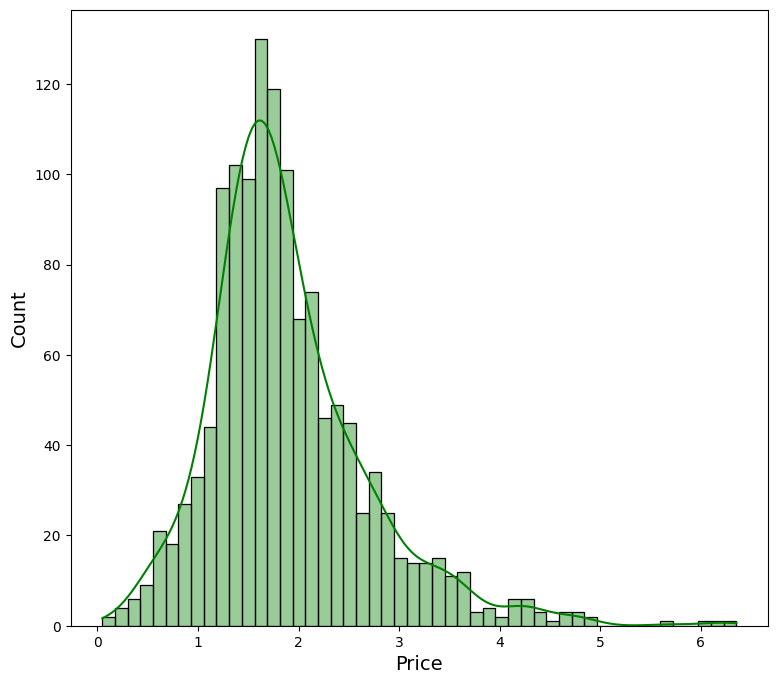

In [30]:
plt.figure(figsize=(9,8))
sns.histplot(housing['Price'], bins = 50, color = 'g', kde = True, alpha = 0.4)

<Axes: xlabel='Price'>

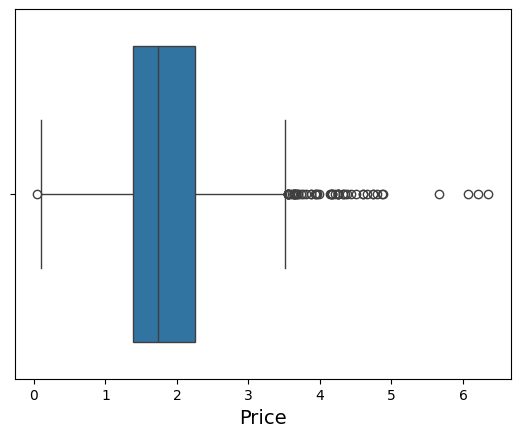

In [31]:
sns.boxplot(x=housing['Price'])

Dựa trên hình ảnh histogram và đường cong mật độ xác suất, có thể nhận xét về phân phối giá nhà như sau:

+ Phân phối lệch phải: Histogram cho thấy phân phối giá nhà có xu hướng lệch phải, nghĩa là có một “đuôi” kéo dài về phía giá cao. Điều này cho thấy số lượng nhà có giá thấp nhiều hơn so với nhà có giá cao.
+ Tập trung giá thấp: Phần lớn các ngôi nhà tập trung ở khoảng giá thấp (tập trung khoảng xấp xỉ trong đoạn giá $(\exp(1.2); \exp(2))$ tỷ đồng), được biểu thị bằng các cột cao ở phía bên trái của histogram.
+ Nhà giá cao ít hơn: Số lượng nhà có giá cao hơn là ít và phân tán, như thể hiện bởi các cột thấp hơn ở phía bên phải của histogram. Ta có thể xem xét các ngôi nhà có giá cao hơn $\exp(4)$ tỷ đồng là các ngoại lệ (outliers).
+ Mô hình phân phối: Đường cong mật độ xác suất cố gắng khớp với dữ liệu quan sát và có thể giúp xác định các thông số thống kê như trung bình, trung vị, và độ lệch chuẩn của phân phối giá nhà.

Cuối cùng, để cho tiện hơn trong các bước sau, tôi sẽ thay các giá trị `True` hoặc `False` trong cột thành `1` hoặc `0`:

In [32]:
# replace True with 1 and False with 0
housing['Chỗ để xe hơi'] = housing['Chỗ để xe hơi'].replace({True: 1, False: 0})
housing['Đang cho thuê'] = housing['Đang cho thuê'].replace({True: 1, False: 0})
housing['CSVC xung quanh'] = housing['CSVC xung quanh'].replace({True: 1, False: 0})

/tmp/ipykernel_28912/114320692.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing['Chỗ để xe hơi'] = housing['Chỗ để xe hơi'].replace({True: 1, False: 0})
/tmp/ipykernel_28912/114320692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Chỗ để xe hơi'] = housing['Chỗ để xe hơi'].replace({True: 1, False: 0})
/tmp/ipykernel_28912/114320692.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

***Mở rộng***. Cùng xem các cột dữ liệu khác phân phối như thế nào:

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Diện tích (m2)'}>],
       [<Axes: title={'center': 'Số phòng ngủ'}>,
        <Axes: title={'center': 'Số phòng WC'}>,
        <Axes: title={'center': 'Chỗ để xe hơi'}>],
       [<Axes: title={'center': 'Đang cho thuê'}>,
        <Axes: title={'center': 'CSVC xung quanh'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >]],
      dtype=object)

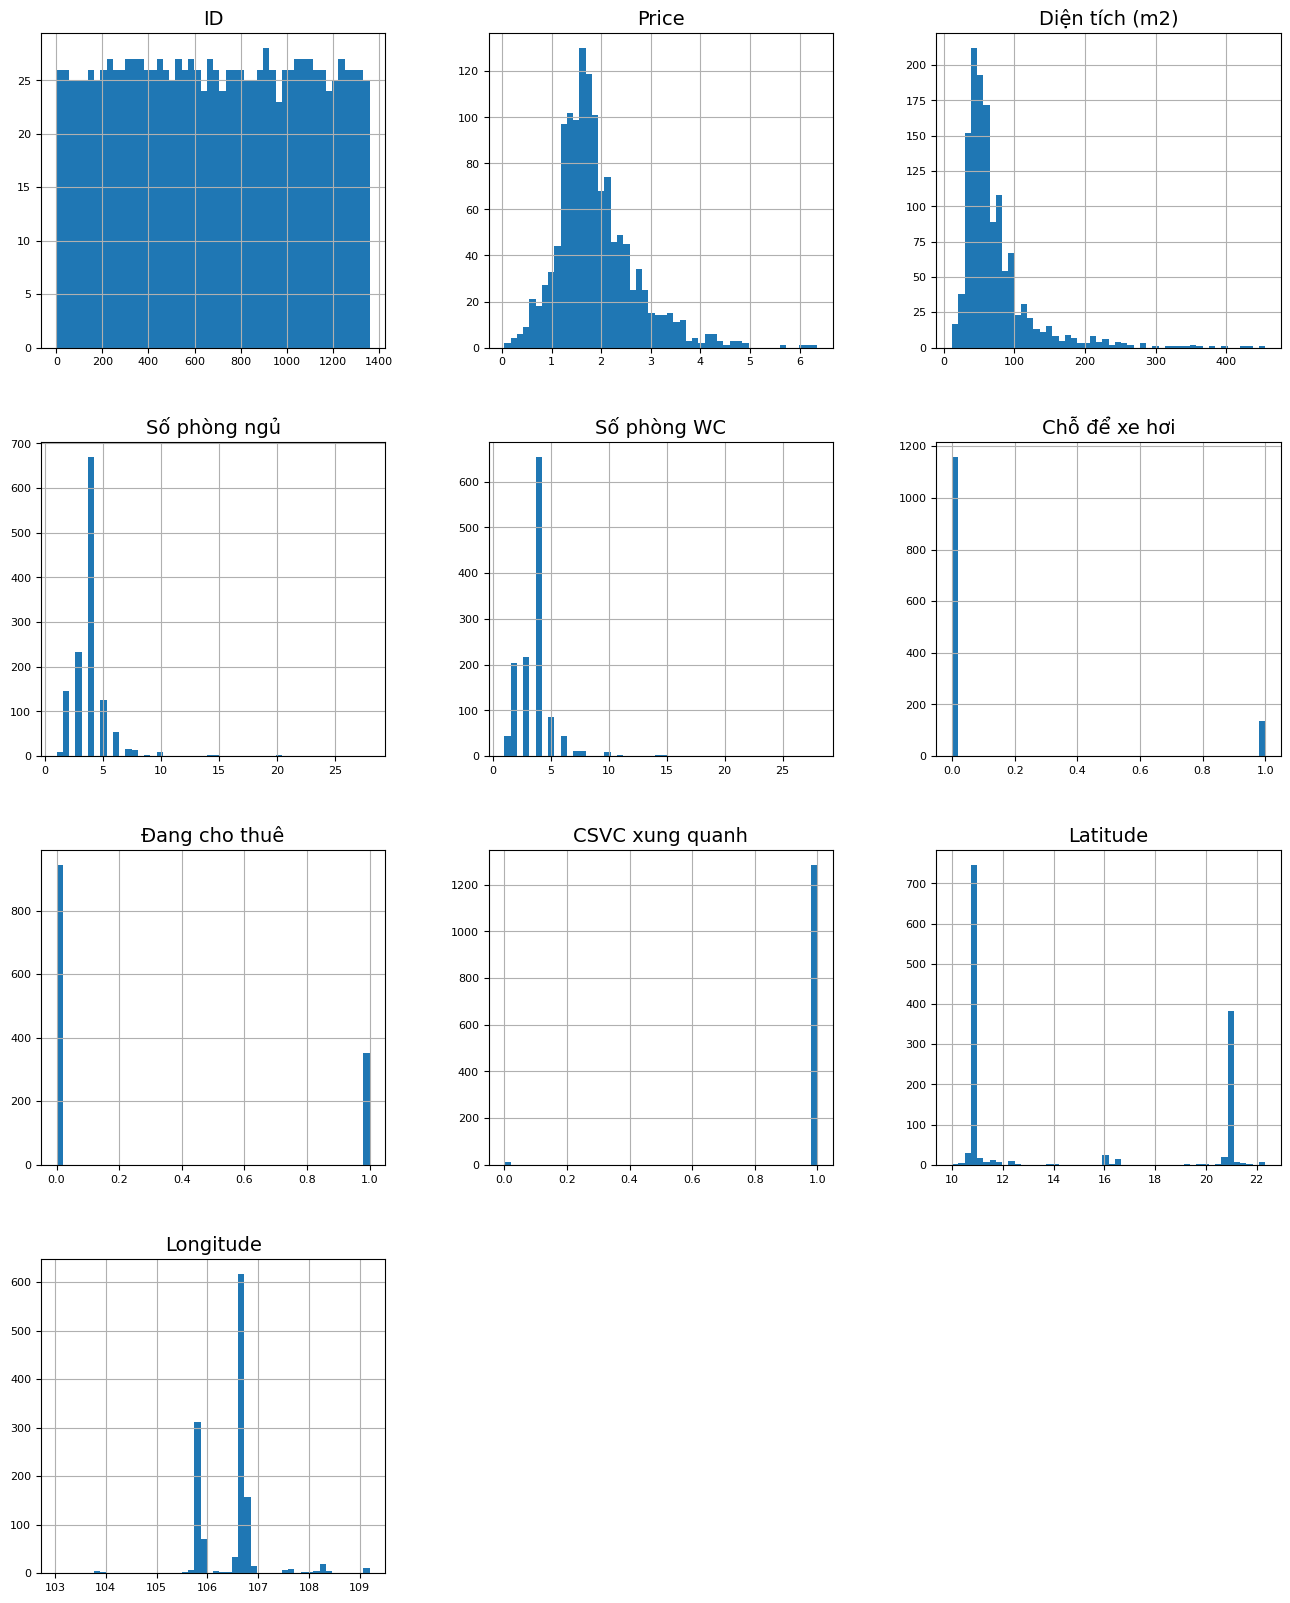

In [33]:
housing.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## 4. Feature Scaling

Do `Price` là biến mục tiêu, ta sẽ tìm mối tương quan giữa `Price` và các biến độc lập còn lại.

Ta sẽ tiến hành loại bỏ các outliers của `Price`:

In [34]:
# Drop outliers in 'Price'
Q1 = housing['Price'].quantile(0.25)
Q3 = housing['Price'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['Price'] > (Q1 - 1.5 * IQR)) & (housing['Price'] < (Q3 + 1.5 * IQR))]

housing

,ID,Price,Diện tích (m2),Số phòng ngủ,Số phòng WC,Chỗ để xe hơi,Đang cho thuê,CSVC xung quanh,Latitude,Longitude
0,1,1.871802,80.0,4.0,4.0,0,0,1,10.793893,106.737836
1,2,2.760010,138.0,5.0,6.0,0,0,1,12.257614,109.167880
3,3,2.219203,57.0,4.0,3.0,0,1,1,10.810071,106.625681
4,4,1.808289,55.0,4.0,4.0,0,0,1,10.794555,106.663271
6,5,1.704748,31.0,4.0,3.0,0,0,1,20.686127,105.313119
...,...,...,...,...,...,...,...,...,...,...
3321,1356,2.734368,112.0,3.0,3.0,0,1,1,10.878682,106.729109
3343,1357,2.525729,60.0,2.0,2.0,0,0,1,10.824282,106.706926
3348,1358,0.788457,175.0,3.0,2.0,0,1,0,14.013279,107.991768
3353,1359,1.774952,115.0,3.0,3.0,1,1,1,10.876230,106.730243


<Axes: xlabel='Price', ylabel='Count'>

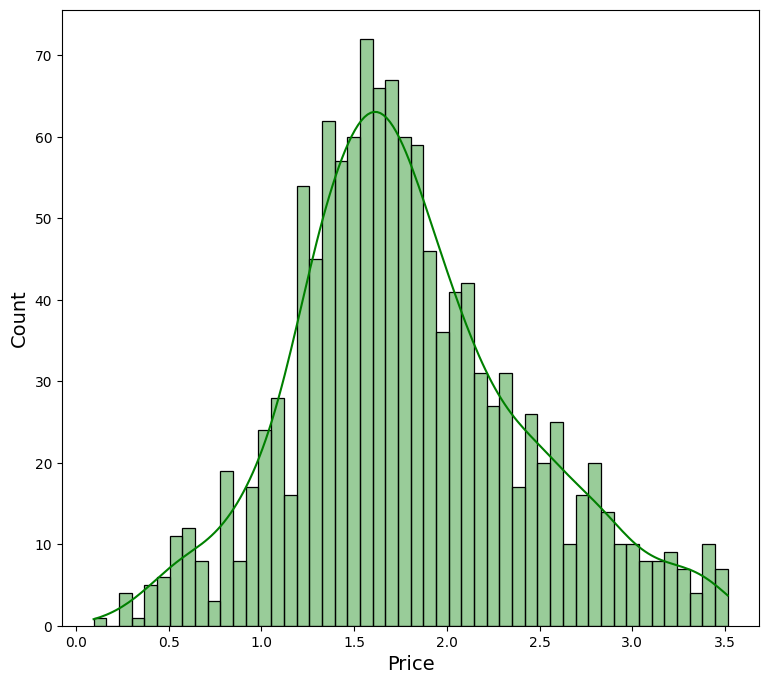

In [35]:
plt.figure(figsize=(9,8))
sns.histplot(housing['Price'], bins = 50, color = 'g', kde = True, alpha = 0.4)

In [36]:
# standardize the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing.drop(['ID', 'Latitude', 'Longitude'], axis=1))

housing_scaled

array([[  0.130618  ,   0.18704737,  -0.01101286, ...,  -0.34515732,
         -0.60841248,   0.09460637],
       [  1.55072571,   1.40171529,   0.52451464, ...,  -0.34515732,
         -0.60841248,   0.09460637],
       [  0.6860593 ,  -0.29463128,  -0.01101286, ...,  -0.34515732,
          1.64362177,   0.09460637],
       ...,
       [ -1.60148388,   2.17658966,  -0.54654037, ...,  -0.34515732,
          1.64362177, -10.57011224],
       [ -0.02422999,   0.92003664,  -0.54654037, ...,   2.89722961,
          1.64362177,   0.09460637],
       [  1.214065  ,  -0.23180363,  -1.08206787, ...,  -0.34515732,
         -0.60841248,   0.09460637]])

## 5. Tìm mối tương quan

In [37]:
corr_matrix = housing.corr(numeric_only=True)

In [38]:
# ignore `ID` column
corr_matrix = corr_matrix.drop('ID', axis=1).drop('ID', axis=0)

corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Diện tích (m2)     0.038072
Đang cho thuê      0.015098
Latitude           0.007740
Số phòng ngủ       0.000919
CSVC xung quanh   -0.000482
Longitude         -0.001418
Số phòng WC       -0.005447
Chỗ để xe hơi     -0.011688
Name: Price, dtype: float64

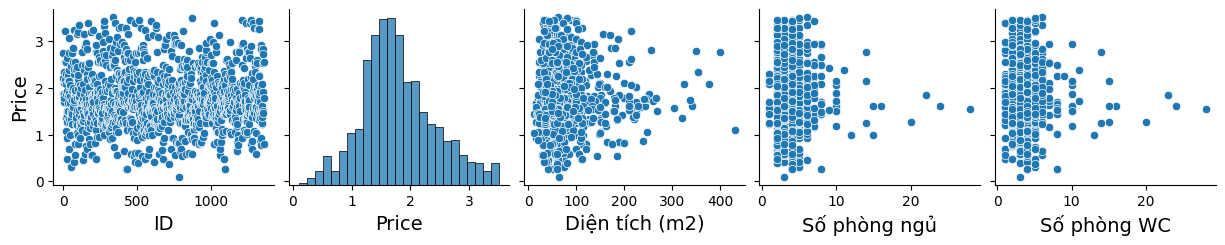

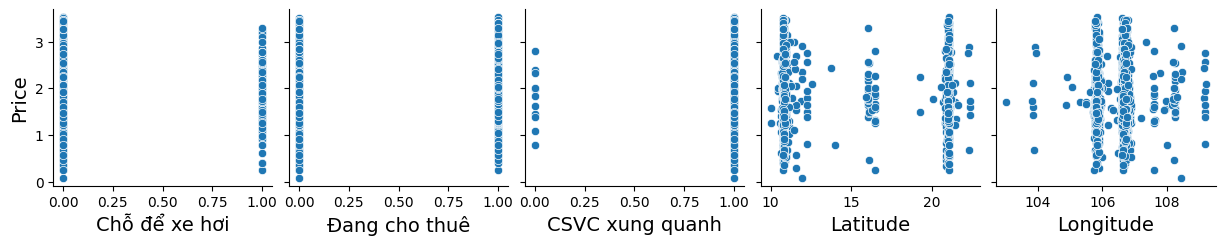

In [39]:
for i in range(0, len(housing.columns), 5):
    sns.pairplot(data=housing, x_vars=housing.columns[i:i+5], y_vars=['Price'])

Dựa trên sự tương quan trên, tôi có một số phân tích về mối tương quan giữa các biến trong bộ dữ liệu:

+ `Price` và `Diện Tích (m2)`: Có vẻ như có một mối tương quan dương giữa giá và diện tích của bất động sản, tức là khi diện tích lớn hơn, giá cũng có xu hướng tăng theo (nhưng không đáng kể).
+ `Price` và `Số Phòng Ngủ`: Có thể có một xu hướng nhẹ là giá tăng khi số phòng ngủ tăng.
+ `Price` và `Số Phòng WC`: Tương tự như số phòng ngủ, mối tương quan giữa giá và số phòng WC cũng không rõ ràng. Cần phải xem xét thêm dữ liệu để đưa ra kết luận chính xác hơn.
+ Những dữ liệu khác thì không có mối tương quan rõ ràng với `Price`.